In [10]:
# ======================================
# 1️⃣ CÀI ĐẶT & IMPORT
# ======================================
!pip install tensorflow matplotlib numpy

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0, ResNet50
import matplotlib.pyplot as plt
import numpy as np
import os


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:

# ======================================
# 2️⃣ TẠO BỘ DỮ LIỆU TRASHNET
# ======================================
dataset_dir = 'dataset_resized'  
img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation'
)

num_classes = train_gen.num_classes

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [12]:

# ======================================
# 3️⃣ HÀM XÂY DỰNG MÔ HÌNH
# ======================================
def build_model(base_model):
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [13]:
# ======================================
# 4️⃣ KHỞI TẠO CÁC MÔ HÌNH
# ======================================
models_dict = {
    "MobileNetV2": build_model(MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))),
    "EfficientNetB0": build_model(EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3))),
    "ResNet50": build_model(ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3)))
}

In [14]:
# ======================================
# 5️⃣ HUẤN LUYỆN & GHI NHẬN KẾT QUẢ
# ======================================
results = {}

epochs = 10
steps_per_epoch = train_gen.samples // batch_size
validation_steps = val_gen.samples // batch_size

for name, model in models_dict.items():
    print(f"\n============================")
    print(f"🚀 Đang huấn luyện mô hình: {name}")
    print(f"============================")

    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=1
    )

    # Lưu kết quả
    results[name] = history.history

    # Lưu các trained model
    model.save(f'{name}_model.h5')



🚀 Đang huấn luyện mô hình: MobileNetV2
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 291ms/step - accuracy: 0.5858 - loss: 1.0955 - val_accuracy: 0.6667 - val_loss: 0.8502
Epoch 2/10
 1/63 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.5000 - loss: 1.3207

c:\Users\PC-09\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5000 - loss: 1.3207 - val_accuracy: 0.6708 - val_loss: 0.8437
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 215ms/step - accuracy: 0.7294 - loss: 0.7360 - val_accuracy: 0.7083 - val_loss: 0.7327
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8125 - loss: 0.5272 - val_accuracy: 0.7458 - val_loss: 0.7252
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 223ms/step - accuracy: 0.7861 - loss: 0.5988 - val_accuracy: 0.7292 - val_loss: 0.6830
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9375 - loss: 0.2902 - val_accuracy: 0.7208 - val_loss: 0.6724
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - accuracy: 0.8007 - loss: 0.5572 - val_accuracy: 0.7042 - val_loss: 0.7146
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.7500 - loss: 0.7897 - val_accuracy: 0.7292 - val_loss: 0.6711
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 248ms/step - accuracy: 0.8253 - loss: 0.4757 - val_accuracy: 0.7479 - val_


🚀 Đang huấn luyện mô hình: EfficientNetB0
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 532ms/step - accuracy: 0.2209 - loss: 1.7599 - val_accuracy: 0.2354 - val_loss: 1.7316
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.2812 - loss: 1.7048 - val_accuracy: 0.2354 - val_loss: 1.7327
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 394ms/step - accuracy: 0.2058 - loss: 1.7447 - val_accuracy: 0.2354 - val_loss: 1.7358
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.1562 - loss: 1.7385 - val_accuracy: 0.2375 - val_loss: 1.7343
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 299ms/step - accuracy: 0.2219 - loss: 1.7407 - val_accuracy: 0.2333 - val_loss: 1.7255
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.2188 - loss: 1.7345 - val_accuracy: 0.2313 - val_loss: 1.7306
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 371ms/step - accuracy: 0.2204 - loss: 1.7406 - val_accuracy: 0.2354 - val_loss: 1.7321
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accurac


🚀 Đang huấn luyện mô hình: ResNet50
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 576ms/step - accuracy: 0.2405 - loss: 1.8027 - val_accuracy: 0.2958 - val_loss: 1.6840
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.1250 - loss: 1.8897 - val_accuracy: 0.2958 - val_loss: 1.6825
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 576ms/step - accuracy: 0.2565 - loss: 1.6938 - val_accuracy: 0.2646 - val_loss: 1.6430
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step - accuracy: 0.3438 - loss: 1.6571 - val_accuracy: 0.2688 - val_loss: 1.6509
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 570ms/step - accuracy: 0.2475 - loss: 1.6764 - val_accuracy: 0.2792 - val_loss: 1.6335
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.4375 - loss: 1.6446 - val_accuracy: 0.2708 - val_loss: 1.6303
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 507ms/step - accuracy: 0.2605 - loss: 1.6542 - val_accuracy: 0.3229 - val_loss: 1.6442
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy:

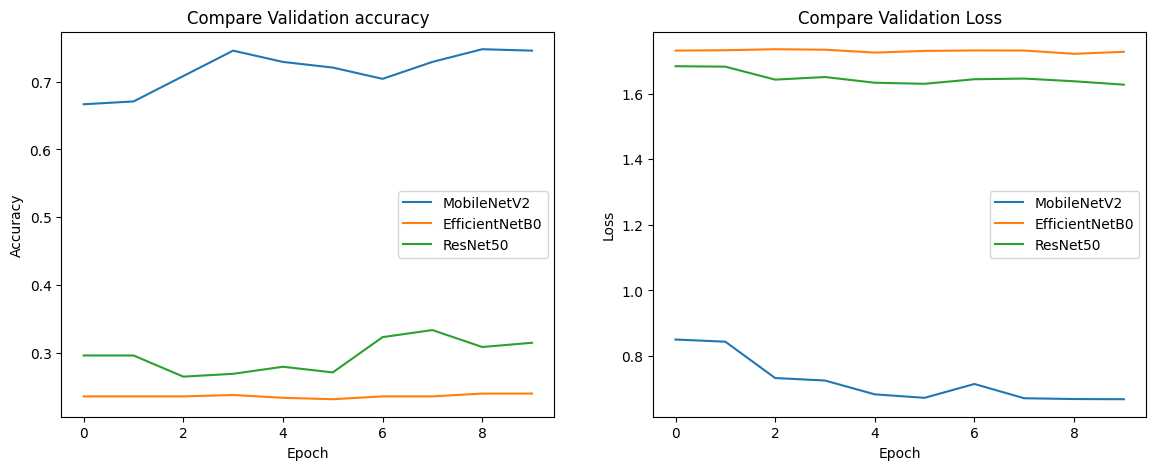

In [17]:

# ======================================
# 6️⃣ VẼ BIỂU ĐỒ SO SÁNH
# ======================================
plt.figure(figsize=(14,5))

# Accuracy
plt.subplot(1,2,1)
for name, hist in results.items():
    plt.plot(hist['val_accuracy'], label=f'{name}')
plt.title('Compare Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
for name, hist in results.items():
    plt.plot(hist['val_loss'], label=f'{name}')
plt.title('Compare Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [18]:

# ======================================
# 7️⃣ IN KẾT QUẢ CUỐI
# ======================================
for name, hist in results.items():
    acc = hist['val_accuracy'][-1]
    loss = hist['val_loss'][-1]
    print(f"✅ {name}: Validation Accuracy = {acc:.4f}, Loss = {loss:.4f}")

✅ MobileNetV2: Validation Accuracy = 0.7458, Loss = 0.6681
✅ EfficientNetB0: Validation Accuracy = 0.2396, Loss = 1.7279
✅ ResNet50: Validation Accuracy = 0.3146, Loss = 1.6277
